In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [19]:
data=pd.read_csv("caravan.csv")

# Initially splitting into train and test data set

In [20]:
cond=data['ORIGIN']=='test'
cond1=data['ORIGIN']=='train'

data_train= data.loc[cond1,:]
data_test=data.loc[cond,:]



In [21]:
data_train.shape


(5822, 87)

In [22]:
data_test.shape

(4000, 87)

In [23]:
data_train['CARAVAN'].value_counts()

data_test['CARAVAN'].value_counts()


0    3762
1     238
Name: CARAVAN, dtype: int64

In [24]:
#Train test contains the imbalanced classification so we are going for downsampling 

from sklearn.utils import resample

df_majority = data_train[data_train.CARAVAN==0]
df_minority = data_train[data_train.CARAVAN==1]

#test sampling

#df_majority_test= data_test[data_train.CARAVAN==0]
#df_minority_test = data_test[data_train.CARAVAN==1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=400,     # to match minority class
                                 random_state=123) # reproducible results
 
 # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 

# Display new class counts
df_downsampled.CARAVAN.value_counts()
# 1    49

0    400
1    348
Name: CARAVAN, dtype: int64

In [25]:
a=df_downsampled.isna().sum().value_counts()


In [26]:
df_downsampled.info()

df_downsampled.columns()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 2586 to 5819
Data columns (total 87 columns):
ORIGIN      748 non-null object
MOSTYPE     748 non-null int64
MAANTHUI    748 non-null int64
MGEMOMV     748 non-null int64
MGEMLEEF    748 non-null int64
MOSHOOFD    748 non-null int64
MGODRK      748 non-null int64
MGODPR      748 non-null int64
MGODOV      748 non-null int64
MGODGE      748 non-null int64
MRELGE      748 non-null int64
MRELSA      748 non-null int64
MRELOV      748 non-null int64
MFALLEEN    748 non-null int64
MFGEKIND    748 non-null int64
MFWEKIND    748 non-null int64
MOPLHOOG    748 non-null int64
MOPLMIDD    748 non-null int64
MOPLLAAG    748 non-null int64
MBERHOOG    748 non-null int64
MBERZELF    748 non-null int64
MBERBOER    748 non-null int64
MBERMIDD    748 non-null int64
MBERARBG    748 non-null int64
MBERARBO    748 non-null int64
MSKA        748 non-null int64
MSKB1       748 non-null int64
MSKB2       748 non-null int64
MSKC        748 non-nu

TypeError: 'Index' object is not callable

In [27]:
df_downsampled.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,...,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,22.040107,1.100267,2.712567,3.002674,5.271390,0.729947,4.747326,1.064171,3.109626,6.430481,...,0.004011,0.010695,0.012032,0.639037,0.002674,0.020053,0.041444,0.013369,0.028075,0.465241
std,13.573874,0.375772,0.766782,0.839132,3.014891,1.028021,1.667568,1.041906,1.651339,1.815221,...,0.063245,0.102932,0.131370,0.528366,0.051674,0.149516,0.247383,0.114926,0.165297,0.499124
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,2.000000,2.000000,2.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,1.000000,3.000000,3.000000,5.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,41.000000,7.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000


# Chi-sq contingency test for cat variables.

In [39]:
from scipy.stats import chi2_contingency
dict1={}
list1=[]
list2=[]
for i in df_downsampled.columns:
    chi2_stat, p_val, dof, ex = chi2_contingency(pd.crosstab(df_downsampled['CARAVAN'],df_downsampled[i]))
    if p_val > 0.02:
        list1.append(i)
    else:
        list2.append(i)

print(list2)
print(list1)

df_best=df_downsampled[list2]
df_best_test=data_test[list2]



['MOSTYPE', 'MOSHOOFD', 'MRELGE', 'MRELOV', 'MOPLHOOG', 'MOPLLAAG', 'MSKA', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT0', 'MINKM30', 'MINK4575', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PPERSAUT', 'PBRAND', 'AWAPART', 'APERSAUT', 'ABRAND', 'APLEZIER', 'ABYSTAND', 'CARAVAN']
['ORIGIN', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELSA', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLMIDD', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKB1', 'MSKB2', 'MAUT2', 'MZFONDS', 'MZPART', 'MINK3045', 'MINK7512', 'MINK123M', 'PWABEDR', 'PWALAND', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWABEDR', 'AWALAND', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'AZEILPL', 'AFIETS', 'AINBOED']


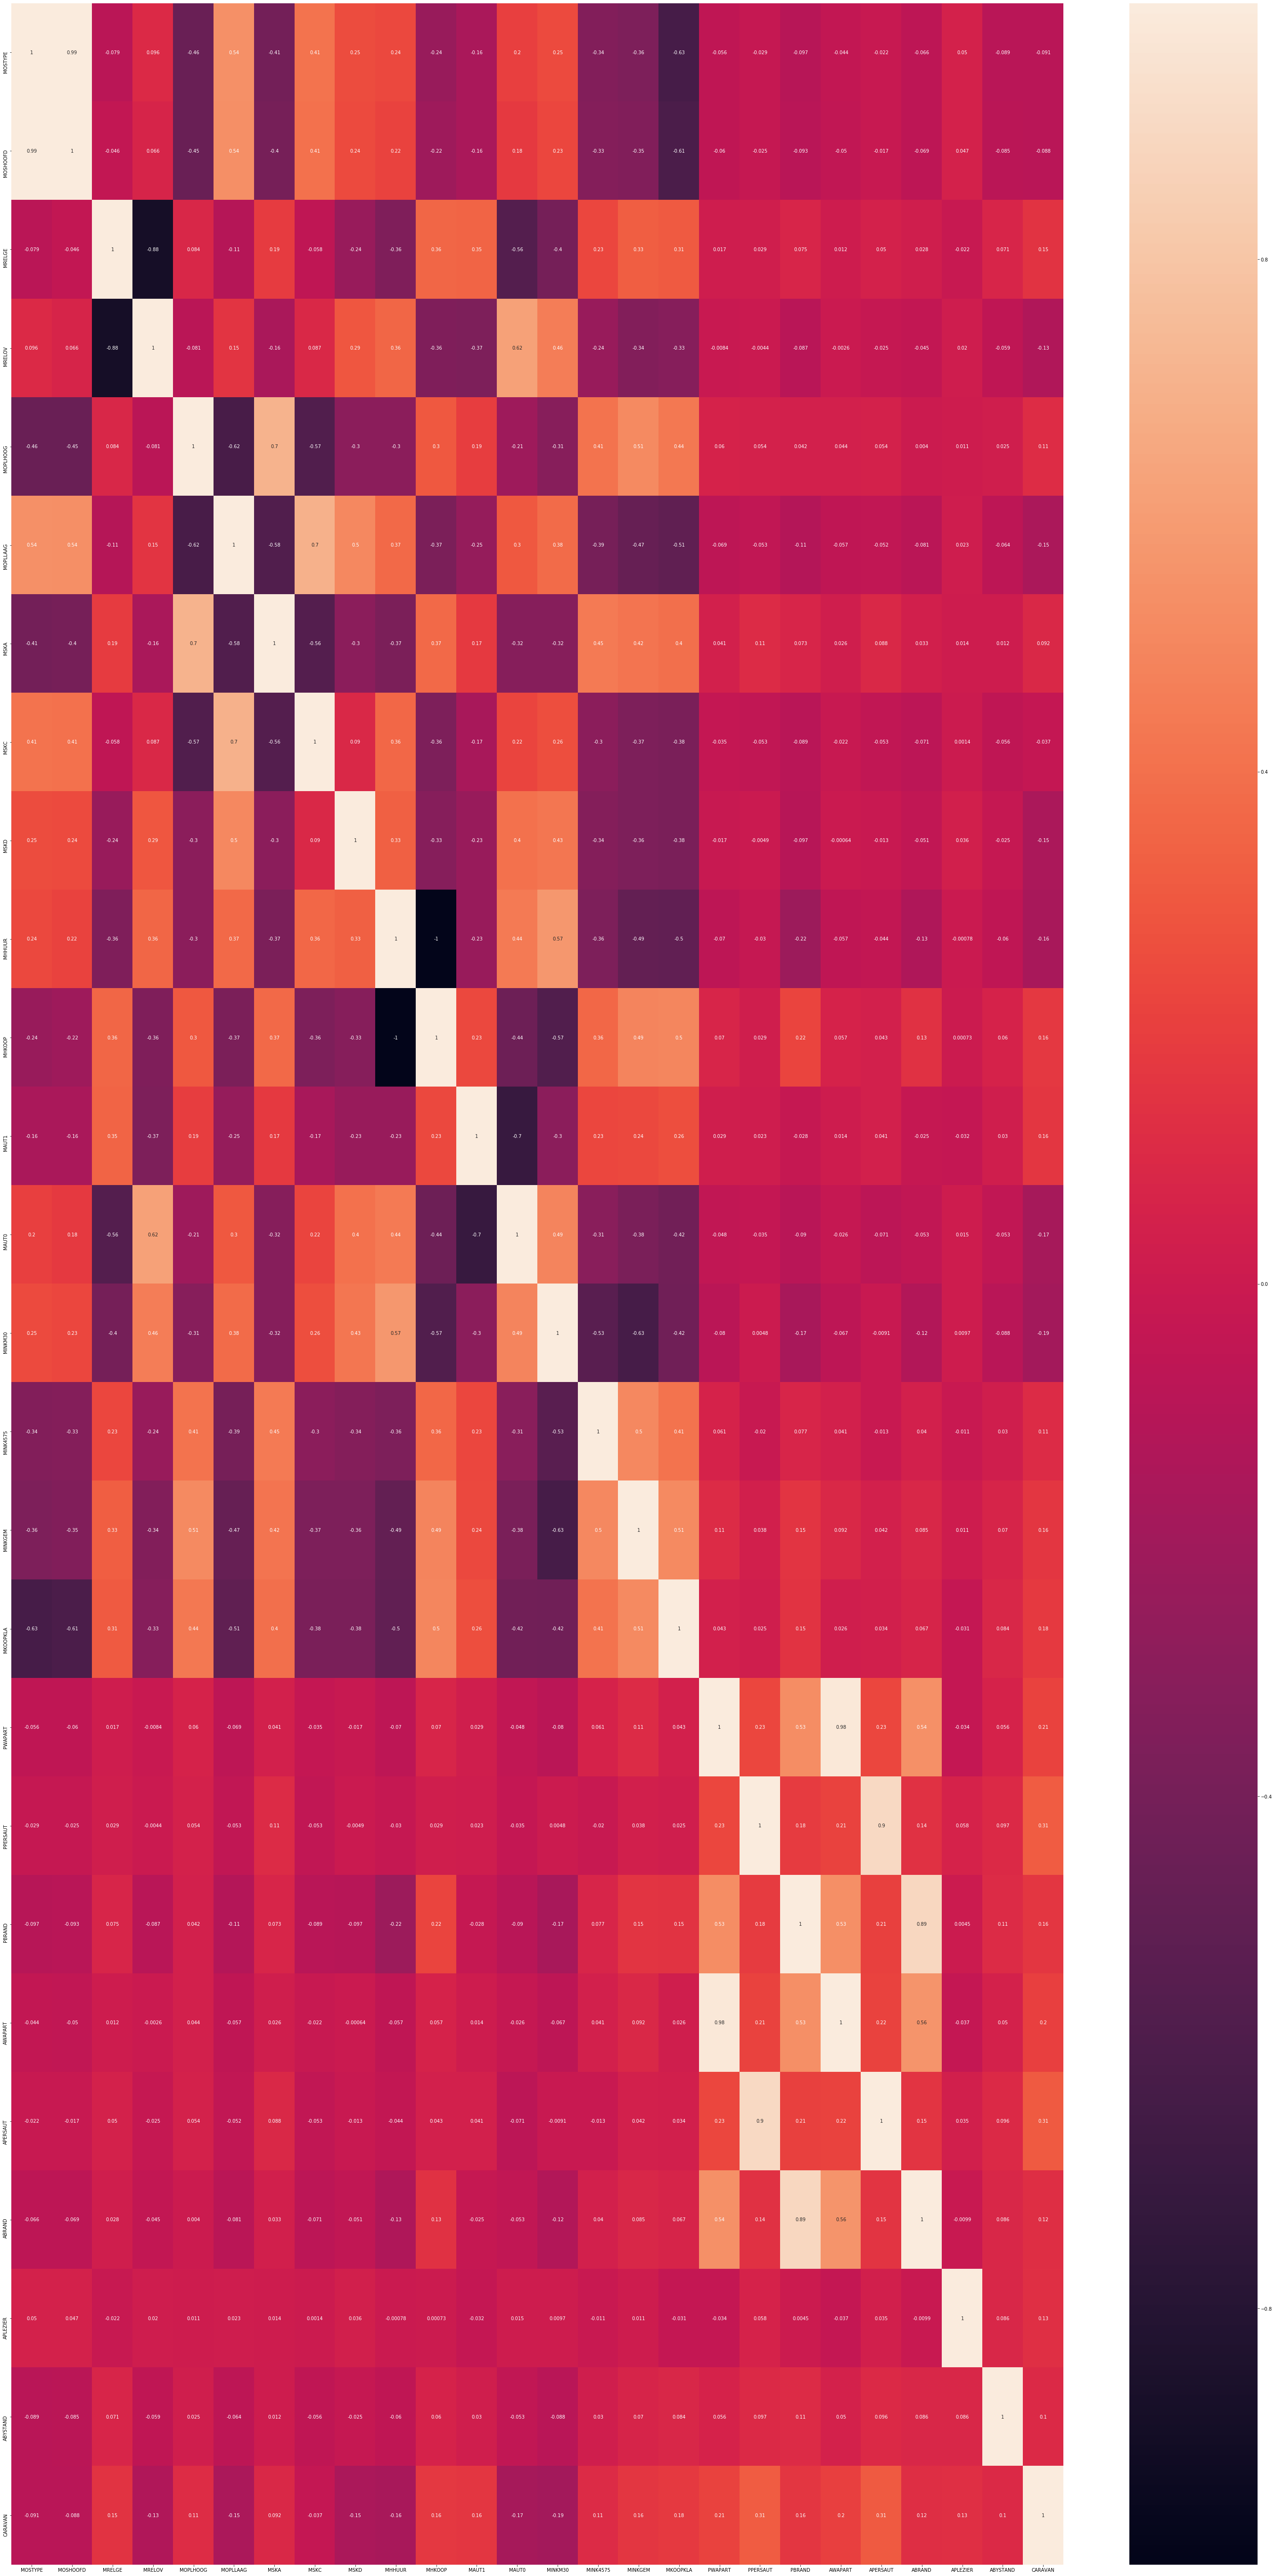

In [40]:
plt.subplots(figsize=(50,100))
sns.heatmap(df_best.corr(),annot=True)

In [41]:
df_best.head()
#df_best.shape

,MOSTYPE,MOSHOOFD,MRELGE,MRELOV,MOPLHOOG,MOPLLAAG,MSKA,MSKC,MSKD,MHHUUR,...,MKOOPKLA,PWAPART,PPERSAUT,PBRAND,AWAPART,APERSAUT,ABRAND,APLEZIER,ABYSTAND,CARAVAN
2586,25,6,7,2,0,4,0,2,2,1,...,1,2,5,2,1,1,1,0,0,0
1851,33,8,5,4,0,9,0,7,2,6,...,3,0,6,0,0,1,0,0,0,0
3040,33,8,6,3,1,5,1,5,1,5,...,3,0,0,0,0,0,0,0,0,0
4585,6,2,9,0,6,0,6,0,0,0,...,8,0,5,0,0,1,0,0,0,0
1988,9,3,7,2,3,2,3,2,1,6,...,4,2,0,4,1,0,1,0,0,0


# Model Development

In [43]:
X_train=df_best.iloc[:,:30]
Y_train=df_best['CARAVAN']


# to check the model based on RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)

X_train.head()

,MOSTYPE,MOSHOOFD,MRELGE,MRELOV,MOPLHOOG,MOPLLAAG,MSKA,MSKC,MSKD,MHHUUR,...,MKOOPKLA,PWAPART,PPERSAUT,PBRAND,AWAPART,APERSAUT,ABRAND,APLEZIER,ABYSTAND,CARAVAN
2586,25,6,7,2,0,4,0,2,2,1,...,1,2,5,2,1,1,1,0,0,0
1851,33,8,5,4,0,9,0,7,2,6,...,3,0,6,0,0,1,0,0,0,0
3040,33,8,6,3,1,5,1,5,1,5,...,3,0,0,0,0,0,0,0,0,0
4585,6,2,9,0,6,0,6,0,0,0,...,8,0,5,0,0,1,0,0,0,0
1988,9,3,7,2,3,2,3,2,1,6,...,4,2,0,4,1,0,1,0,0,0


In [44]:
X_test=df_best_test.iloc[:,:30]
Y_test=df_best_test['CARAVAN']

In [45]:
y_pred=clf.predict(X_test)

In [46]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("confusion:",metrics.confusion_matrix(Y_test, y_pred))

Accuracy: 1.0
confusion: [[3762    0]
 [   0  238]]


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 1.0


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
clf=LogisticRegression()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 1.0


C:\Users\Jayandran\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Model came with 100% accuracy rates, with no FP and FN